# Siemens - Sales Forecast

In [15]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurations
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [36]:
# Import files 

# Import xlsx dataset into pandas dataframe
market_data = pd.read_excel('../Data/Case2_Market data.xlsx', header=[0,1,2])

# Import csv dataset into pandas dataframe
sales_data = pd.read_csv('../Data/Case2_Sales data.csv', sep=";")



## Case 2 Market Data

In [37]:
market_data.head()

Unnamed: 0_level_0  \
  Index 2010=100 (if not otherwise noted)   
                                     date   
0                                  2004m2   
1                                  2004m3   
2                                  2004m4   
3                                  2004m5   
4                                  2004m6   

                                     China  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO156   
0                                16.940704   
1                                23.711852   
2                                24.435235   
3                                23.708115   
4                                27.009138   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP156   
0                               16.940704   
1                               23.711852   
2                               24.435235   
3                               23.708115   
4                               27.009138   

                                    France  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO250   
0                               112.091273   
1                               136.327976   
2                               117.791806   
3                               109.002541   
4                               133.785737   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP250   
0                               83.458866   
1                              106.168192   
2                               92.007646   
3                               85.696486   
4                              106.641482   

                                   Germany  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO276   
0                                82.623037   
1                               100.556582   
2                                89.653203   
3                                86.880571   
4                                99.010814   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP276   
0                               79.452532   
1                               97.012918   
2                               84.932358   
3                               82.372794   
4                               95.108740   

                                     Italy  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO380   
0                               124.289603   
1                               143.411662   
2                               129.083828   
3                               135.590391   
4                               136.424935   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP380   
0                               86.560493   
1                              106.344544   
2                               95.579673   
3                              100.087039   
4                              110.889719   

                                     Japan  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO392   
0                               109.334010   
1                               140.884616   
2                               105.853579   
3                               101.864777   
4                               120.332920   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP392   
0                              110.495272   
1                              144.686166   
2                              102.655769   
3                              100.305285   
4                              119.616380   

            

In [64]:
# Keep only the third header row (index 2)
market_data.columns = market_data.columns.droplevel([0,1])
market_data.head()

,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,MAB_ELE_SHP392,MAB_ELE_PRO756,MAB_ELE_SHP756,MAB_ELE_PRO826,MAB_ELE_SHP826,MAB_ELE_PRO840,MAB_ELE_SHP840,MAB_ELE_PRO1100,MAB_ELE_SHP1100,RohiBASEMET1000_org,RohiENERGY1000_org,RohiMETMIN1000_org,RohiNATGAS1000_org,RohCRUDE_PETRO1000_org,RohCOPPER1000_org,WKLWEUR840_org,PRI27840_org,PRI27826_org,PRI27380_org,PRI27250_org,PRI27276_org,PRI27156_org,PRO28840_org,PRO281000_org,PRO28756_org,PRO28826_org,PRO28380_org,PRO28392_org,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org
0,2004m2,16.9407,16.9407,112.0913,83.4589,82.6230,79.4525,124.2896,86.5605,109.3340,110.4953,91.2219,89.9873,111.3538,73.6013,107.6014,79.2402,97.1229,80.0985,54.0398,44.1233,48.7479,87.0770,39.6395,36.6238,1.2646,78.9699,80.7574,93.0200,NaN,93.2305,NaN,102.4917,97.5974,97.1000,106.1920,116.7903,110.8900,118.2741,80.8290,117.7240,NaN,81.1000,120.7065,141.5109,106.1613,102.0771,85.9132
1,2004m3,23.7119,23.7119,136.3280,106.1682,100.5566,97.0129,143.4117,106.3445,140.8846,144.6862,85.8663,79.8836,127.5586,84.0476,110.1874,98.6190,113.7839,96.0159,54.6662,47.5890,49.2562,87.1927,42.5920,39.9311,1.2262,79.6736,80.9621,93.5403,NaN,93.3357,NaN,105.6275,113.2249,91.1951,121.6251,139.2884,141.1769,148.1218,102.1301,119.2208,NaN,76.6903,138.3095,152.8802,140.2887,117.2257,97.6708
2,2004m4,24.4352,24.4352,117.7918,92.0076,89.6532,84.9324,129.0838,95.5797,105.8536,102.6558,85.6225,79.7408,108.7323,73.0260,108.1666,89.7740,101.7152,85.1672,54.8727,47.7790,49.4238,91.3799,42.6506,39.1349,1.1985,80.3376,80.7574,93.8524,NaN,93.4409,NaN,103.4850,100.1691,93.7935,104.9655,125.2896,105.6488,125.4822,90.9614,117.4411,NaN,71.5524,115.5573,137.7969,106.2712,105.3358,87.2540
3,2004m5,23.7081,23.7081,109.0025,85.6965,86.8806,82.3728,135.5904,100.0870,101.8648,100.3053,85.3787,79.5980,110.6452,74.5919,108.4259,87.4638,101.2757,84.4858,51.2304,53.5909,46.4684,99.0445,47.5171,36.2784,1.2007,80.7988,80.7574,93.8524,NaN,93.5461,NaN,103.6439,99.5814,96.3920,105.8854,131.9890,101.9904,116.6497,88.0829,117.8992,NaN,66.4145,119.2695,143.8605,101.6087,96.6165,84.6756
4,2004m6,27.0091,27.0091,133.7857,106.6415,99.0108,95.1087,136.4249,110.8897,120.3329,119.6164,85.1349,79.4552,122.0210,82.3433,110.5699,97.3645,112.0572,96.9633,52.8763,50.7996,47.8039,98.6363,44.9676,35.6574,1.2138,80.9135,80.5527,93.9565,NaN,93.4409,NaN,106.0627,109.2777,98.9904,118.2523,132.9889,122.1366,143.2487,100.9787,119.4991,NaN,61.2766,128.8494,144.3153,116.6552,118.4587,95.4018


In [65]:
market_data.shape

(219, 48)

In [66]:
market_data.describe()

,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,MAB_ELE_SHP392,MAB_ELE_PRO756,MAB_ELE_SHP756,MAB_ELE_PRO826,MAB_ELE_SHP826,MAB_ELE_PRO840,MAB_ELE_SHP840,MAB_ELE_PRO1100,MAB_ELE_SHP1100,RohiBASEMET1000_org,RohiENERGY1000_org,RohiMETMIN1000_org,RohiNATGAS1000_org,RohCRUDE_PETRO1000_org,RohCOPPER1000_org,WKLWEUR840_org,PRI27840_org,PRI27826_org,PRI27380_org,PRI27250_org,PRI27276_org,PRI27156_org,PRO28840_org,PRO281000_org,PRO28756_org,PRO28826_org,PRO28380_org,PRO28392_org,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org
count,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,218.0000,218.0000,219.0000,201.0000,219.0000,218.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,201.0000,219.0000,184.0000,219.0000,196.0000,219.0000,219.0000,218.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,208.0000,218.0000,219.0000,219.0000,219.0000,219.0000,219.0000
mean,138.3036,138.3036,104.4319,105.3168,107.4991,114.8984,105.2284,105.7354,111.9481,112.6706,97.8345,94.7849,108.7529,95.9571,109.4183,114.1600,108.7800,110.5511,89.7333,92.5580,86.0649,103.3678,89.4465,86.3443,1.2535,102.1857,100.1512,102.1650,101.9694,103.1736,97.6814,108.6688,112.4664,99.7171,104.3849,109.4863,115.0832,109.1167,110.4292,110.9029,111.1471,94.5929,116.6673,95.4505,105.5558,96.8441,102.1255
std,78.8832,78.8832,18.9185,12.7622,11.8619,17.0916,23.5096,19.9482,15.4893,16.8919,8.2415,9.1539,12.0967,12.9462,7.8913,14.6334,11.8395,15.7279,20.8101,30.6154,21.4108,41.7474,30.7368,23.8115,0.1202,10.5241,10.5494,4.4549,2.6469,6.0764,3.2359,9.1324,12.4112,10.4680,13.2227,22.4910,17.4083,21.0501,14.3517,8.4446,12.3212,13.4650,13.2053,29.1954,12.5925,16.8578,9.9599
min,16.9407,16.9407,50.7567,64.4207,74.3329,71.7872,34.2134,45.1917,67.5319,64.3723,77.8015,74.6393,61.0480,57.4629,85.9944,79.2402,69.7866,71.1589,50.8220,31.6323,46.4684,33.9923,26.6234,35.6574,1.0543,78.9699,80.5527,93.0200,96.8646,93.2305,90.2923,83.1973,74.7610,77.9526,51.7162,33.7972,64.0824,54.4162,71.6177,91.5358,83.3102,56.8322,77.9563,34.4871,74.5655,44.8294,76.4246
25%,68.4777,68.4777,93.6135,97.4528,100.5609,103.1498,94.3352,95.9858,103.7400,103.4532,92.4102,88.2210,100.4984,86.1997,104.6000,104.5965,101.7296,98.5880,76.5905,69.9283,71.9569,72.5948,66.7040,72.3822,1.1439,97.3386,91.8117,99.0549,100.2294,98.7022,95.0728,102.8445,104.8336,92.9796,94.5916,99.7417,105.4155,96.5990,102.0150,106.6172,102.7984,90.2837,107.4144,79.1688,97.5477,84.7706,95.6596
50%,133.5077,133.5077,102.7366,106.0122,108.9923,117.4288,105.0885,107.6958,111.6830,112.5973,97.5731,94.3768,108.9110,97.8689,110.1536,115.7134,110.3838,111.9541,88.3904,86.2849,85.0702,100.2854,82.4350,88.9860,1.2400,103.8836,102.2518,103.3209,102.2687,103.4374,97.8530,109.3037,113.6166,98.0512,105.3743,112.4906,115.0922,106.3959,111.3414,109.1566,110.2844,97.6202,116.9943,88.3780,104.3663,95.8238,103.5496
75%,198.4739,198.4739,114.0909,115.0305,115.7358,127.1122,117.0317,119.8364,121.4027,121.4981,103.8771,100.7365,118.0018,105.2696,114.5854,123.4200,115.8325,121.6139,104.3784,120.7204,100.7957,119.1734,116.4139,101.7309,1.3359,105.5929,109.9284,104.8816,103.0844,107.1203,99.8595,114.9915,120.5877,105.0012,114.0618,123.4897,125.6806,120.5584,120.2073,116.4813,117.5515,103.2388,125.9755,110.4725,112.4851,108.1541,108.8612
max,329.4134,329.4134,152.7434,136.8587,130.8700,151.2971,153.9408,153.6451,153.8987,159.4959,116.6746,115.3211,137.6826,126.3385,126.6508,165.9262,134.2162,158.0556,149.8909,173.4836,141.2833,271.0799,168.0464,135.7822,1.5770,137.5316,116.5814,118.4080,113.2807,121.2206,104.5499,131.2298,149.3752,135.3369,133.3788,154.0872,160.9542,167.0051,147.2654,129.7133,152.4529,117.5414,154.8348,164.8560,141.9775,141.2697,121.4955


## Case 2 Sales Data

In [40]:
sales_data.head()

,DATE,Mapped_GCK,Sales_EUR
0,01.10.2018,#1,0
1,02.10.2018,#1,0
2,03.10.2018,#1,0
3,04.10.2018,#1,0
4,05.10.2018,#1,0


In [41]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        9802 non-null   object
 1   Mapped_GCK  9802 non-null   object
 2   Sales_EUR   9802 non-null   object
dtypes: object(3)
memory usage: 229.9+ KB


In [42]:
sales_data.shape

(9802, 3)

In [43]:
sales_data.describe()

,DATE,Mapped_GCK,Sales_EUR
count,9802,9802,9802
unique,1216,14,2609
top,16.04.2021,#1,0
freq,14,1179,7134


In [44]:
sales_data['Mapped_GCK'].value_counts()

Mapped_GCK
#1     1179
#3     1017
#5      959
#8      944
#4      877
#12     803
#6      794
#16     765
#11     732
#13     441
#36     434
#9      333
#20     293
#14     231
Name: count, dtype: int64

## Converting to different data types

In [45]:
sales_data['Sales_EUR'].value_counts()

Sales_EUR
0              7134
200               5
1410              5
950               4
534               4
1175              3
1750              3
-28,5             3
-22520,4          3
1450              2
348               2
3000              2
1                 2
5400              2
-1000             2
-500              2
3685              2
515               2
3600              2
1800              2
-2851,45          2
-35,25            2
500               2
800               2
360               2
12561             2
243840            2
7389,2            2
30846,35          2
6120              2
-224,97           2
4000              2
368               2
2516,88           2
838,96            2
555               2
2030              2
80                2
32229,6           2
1615              2
59                2
306               2
9250              2
267               2
5000              2
211,12            2
14400             2
212202,18         1
3311958,47        1
49098,37  

In [46]:
# Turn Sales_EUR to float

# Relace commas with periods
sales_data['Sales_EUR'] = sales_data['Sales_EUR'].astype(str).str.replace(',', '.').str.strip()

In [48]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        9802 non-null   object
 1   Mapped_GCK  9802 non-null   object
 2   Sales_EUR   9802 non-null   object
dtypes: object(3)
memory usage: 229.9+ KB


In [49]:
sales_data['Sales_EUR'] = pd.to_numeric(sales_data['Sales_EUR'])

sales_data.dtypes

DATE           object
Mapped_GCK     object
Sales_EUR     float64
dtype: object

In [53]:
# Force normal decimal formatting
pd.options.display.float_format = '{:.4f}'.format

In [54]:
sales_data['Sales_EUR'].value_counts()

Sales_EUR
0.0000           7134
200.0000            5
1410.0000           5
950.0000            4
534.0000            4
1175.0000           3
1750.0000           3
-28.5000            3
-22520.4000         3
1450.0000           2
348.0000            2
3000.0000           2
1.0000              2
5400.0000           2
-1000.0000          2
-500.0000           2
3685.0000           2
515.0000            2
3600.0000           2
1800.0000           2
-2851.4500          2
-35.2500            2
500.0000            2
800.0000            2
360.0000            2
12561.0000          2
243840.0000         2
7389.2000           2
30846.3500          2
6120.0000           2
-224.9700           2
4000.0000           2
368.0000            2
2516.8800           2
838.9600            2
555.0000            2
2030.0000           2
80.0000             2
32229.6000          2
1615.0000           2
59.0000             2
306.0000            2
9250.0000           2
267.0000            2
5000.0000           2


In [57]:
sales_data['Sales_EUR'].describe()

count       9802.0000
mean      272785.6867
std      2230789.1619
min      -506381.1700
25%            0.0000
50%            0.0000
75%            0.0000
max     41127988.0200
Name: Sales_EUR, dtype: float64

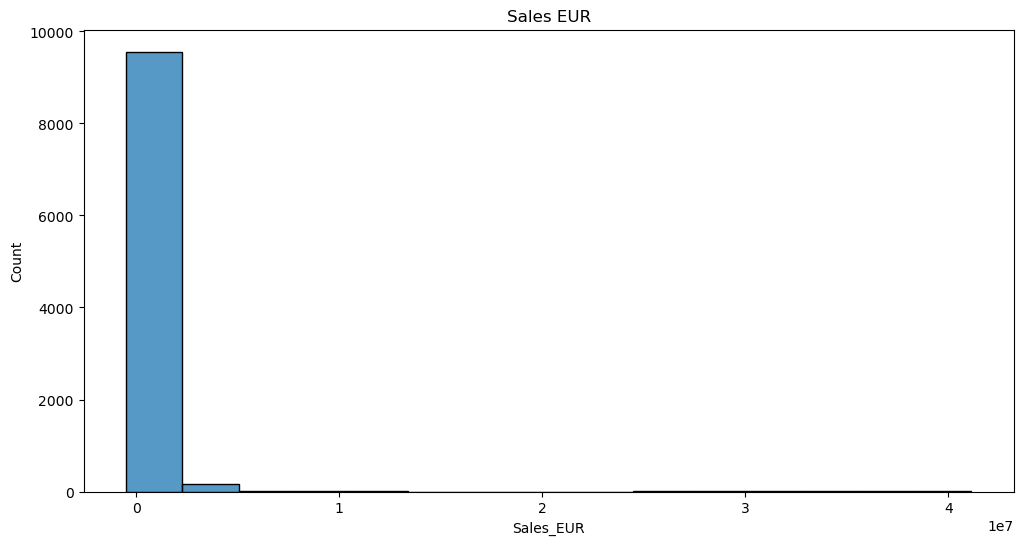

In [58]:
# Check the distribution of Age
plt.figure(figsize=(12, 6))
sns.histplot(sales_data['Sales_EUR'])
plt.title('Sales EUR')
plt.show()

## Aggregating daily sales into monthly

Converting DATE to date data type

In [60]:
sales_data['DATE'] = sales_data['DATE'].apply(pd.to_datetime, dayfirst=True) 

sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        9802 non-null   datetime64[ns]
 1   Mapped_GCK  9802 non-null   object        
 2   Sales_EUR   9802 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 229.9+ KB


In [61]:
sales_data['DATE'].head()

0   2018-10-01
1   2018-10-02
2   2018-10-03
3   2018-10-04
4   2018-10-05
Name: DATE, dtype: datetime64[ns]

In [68]:
# Create a new column in YYYYmM format
sales_data['date'] = sales_data['DATE'].dt.strftime('%Ym%-m')

# Aggregate sales by month
monthly_sales = sales_data.groupby('date')['Sales_EUR'].sum().reset_index()

monthly_sales

,date,Sales_EUR
0,2018m10,49471370.8300
1,2018m11,30760578.4700
2,2018m12,61312068.7900
3,2019m1,51360149.2300
4,2019m10,63440758.3600
5,2019m11,62168871.1800
6,2019m12,65689212.9100
7,2019m2,54336933.6700
8,2019m3,61435886.2800
9,2019m4,60598035.4400


## Adding monthly sales to market data frame

In [69]:

market_data = market_data.merge(monthly_sales, on='date', how='left')

In [70]:
market_data.head()

,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,MAB_ELE_SHP392,MAB_ELE_PRO756,MAB_ELE_SHP756,MAB_ELE_PRO826,MAB_ELE_SHP826,MAB_ELE_PRO840,MAB_ELE_SHP840,MAB_ELE_PRO1100,MAB_ELE_SHP1100,RohiBASEMET1000_org,RohiENERGY1000_org,RohiMETMIN1000_org,RohiNATGAS1000_org,RohCRUDE_PETRO1000_org,RohCOPPER1000_org,WKLWEUR840_org,PRI27840_org,PRI27826_org,PRI27380_org,PRI27250_org,PRI27276_org,PRI27156_org,PRO28840_org,PRO281000_org,PRO28756_org,PRO28826_org,PRO28380_org,PRO28392_org,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org,Sales_EUR
0,2004m2,16.9407,16.9407,112.0913,83.4589,82.6230,79.4525,124.2896,86.5605,109.3340,110.4953,91.2219,89.9873,111.3538,73.6013,107.6014,79.2402,97.1229,80.0985,54.0398,44.1233,48.7479,87.0770,39.6395,36.6238,1.2646,78.9699,80.7574,93.0200,NaN,93.2305,NaN,102.4917,97.5974,97.1000,106.1920,116.7903,110.8900,118.2741,80.8290,117.7240,NaN,81.1000,120.7065,141.5109,106.1613,102.0771,85.9132,NaN
1,2004m3,23.7119,23.7119,136.3280,106.1682,100.5566,97.0129,143.4117,106.3445,140.8846,144.6862,85.8663,79.8836,127.5586,84.0476,110.1874,98.6190,113.7839,96.0159,54.6662,47.5890,49.2562,87.1927,42.5920,39.9311,1.2262,79.6736,80.9621,93.5403,NaN,93.3357,NaN,105.6275,113.2249,91.1951,121.6251,139.2884,141.1769,148.1218,102.1301,119.2208,NaN,76.6903,138.3095,152.8802,140.2887,117.2257,97.6708,NaN
2,2004m4,24.4352,24.4352,117.7918,92.0076,89.6532,84.9324,129.0838,95.5797,105.8536,102.6558,85.6225,79.7408,108.7323,73.0260,108.1666,89.7740,101.7152,85.1672,54.8727,47.7790,49.4238,91.3799,42.6506,39.1349,1.1985,80.3376,80.7574,93.8524,NaN,93.4409,NaN,103.4850,100.1691,93.7935,104.9655,125.2896,105.6488,125.4822,90.9614,117.4411,NaN,71.5524,115.5573,137.7969,106.2712,105.3358,87.2540,NaN
3,2004m5,23.7081,23.7081,109.0025,85.6965,86.8806,82.3728,135.5904,100.0870,101.8648,100.3053,85.3787,79.5980,110.6452,74.5919,108.4259,87.4638,101.2757,84.4858,51.2304,53.5909,46.4684,99.0445,47.5171,36.2784,1.2007,80.7988,80.7574,93.8524,NaN,93.5461,NaN,103.6439,99.5814,96.3920,105.8854,131.9890,101.9904,116.6497,88.0829,117.8992,NaN,66.4145,119.2695,143.8605,101.6087,96.6165,84.6756,NaN
4,2004m6,27.0091,27.0091,133.7857,106.6415,99.0108,95.1087,136.4249,110.8897,120.3329,119.6164,85.1349,79.4552,122.0210,82.3433,110.5699,97.3645,112.0572,96.9633,52.8763,50.7996,47.8039,98.6363,44.9676,35.6574,1.2138,80.9135,80.5527,93.9565,NaN,93.4409,NaN,106.0627,109.2777,98.9904,118.2523,132.9889,122.1366,143.2487,100.9787,119.4991,NaN,61.2766,128.8494,144.3153,116.6552,118.4587,95.4018,NaN
